In [97]:
import numpy as np
import pandas as pd

In [98]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [99]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [100]:
df.shape

(271116, 15)

In [101]:
df=df[df['Season']=='Summer']

In [102]:
df.shape

(222552, 15)

In [103]:
df=df.merge(region_df,on='NOC',how='left')

In [104]:
df['region'].value_counts()

region
USA            15064
Germany        12377
UK             10917
France         10633
Russia          8855
               ...  
Kiribati          11
Brunei            10
Timor-Leste        8
Kosovo             8
South Sudan        3
Name: count, Length: 205, dtype: int64

In [105]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [106]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [107]:
df.duplicated().sum()

np.int64(1385)

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().sum()

np.int64(0)

In [110]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [111]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [112]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [113]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [114]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [115]:
medal_tally[medal_tally['NOC']=='IND']

KeyError: 'NOC'

In [ ]:
medal_tally['total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [ ]:
medal_tally

In [ ]:
years=df['Year'].unique().tolist()

In [ ]:
years.sort()

In [ ]:
years

In [ ]:
years.insert(0,'Overall')

In [ ]:
years

In [ ]:
country=df['region'].unique().tolist()

In [ ]:
country=np.unique(df['region'].dropna().values).tolist()

In [ ]:
country.sort()

In [ ]:
country

In [ ]:
country.insert(0,'overall')

In [ ]:
country

In [ ]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if years=='overall' and country=='overall':
        temp_df=medal_df
    if year=='overall' and country!='overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year!='overall' and country=='overall':
        temp_df=medal_df[['year']==int(year)]

    if year!='overall' and country!='overall':
        temp_df=medal_df[(medal_df['year']==2016) & (medal_df['region']=='country')]
    if flag==1:   
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('year').reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total']=x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [ ]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [ ]:
medal_tally

In [ ]:
df['Year'].unique().shape[0]-1

In [ ]:
df['City'].unique()

In [ ]:
df['Sport'].unique()

In [ ]:
df['Sport'].unique().shape

In [ ]:
df['Event'].unique().shape

In [ ]:
nation=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [ ]:
nation.rename(columns={'Year':'Edition','count':'no of countries'},inplace=True)

In [ ]:
import plotly.express as px

In [ ]:
fig=px.line(nation,x='Edition',y='no of countries')
fig.show()

In [ ]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [ ]:
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20,25))
sns.heatmap(df.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [ ]:
x=df.drop_duplicates(['Year','Sport','Event'])

In [ ]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int)

In [ ]:
def most(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    athlete_medal_count = temp_df['Name'].value_counts().reset_index()
    athlete_medal_count.columns = ['Name', 'Medal count']

    merged_df = athlete_medal_count.merge(df, on='Name', how='left')

    merged_df = merged_df[['Name', 'Medal count', 'Sport', 'region']].drop_duplicates('Name')

    return merged_df.head(15)  
ArithmeticError
    

    

In [ ]:
most(df,'Gymnastics')

In [ ]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'],inplace=True)

In [ ]:
new_df=temp_df[temp_df['region']=='India']
temp_df.groupby('Year').count()['Medal'].reset_index()

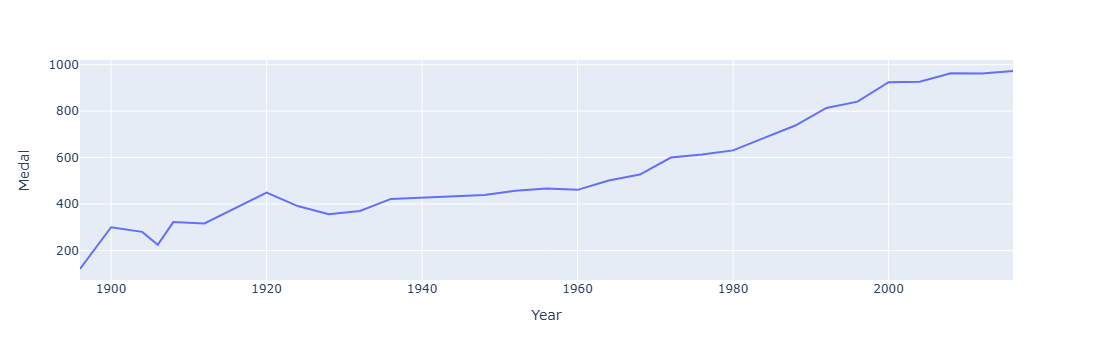

In [88]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [116]:
import plotly.figure_factory as ff

In [117]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

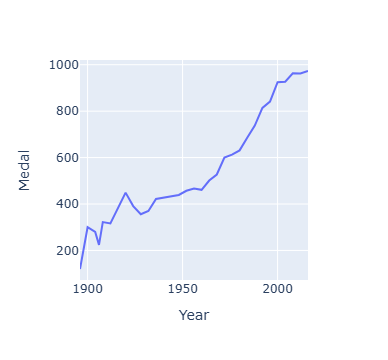

In [118]:
ff.create_distplot([athlete_df['Age'].dropna()],['agedistribution'])
fig.show()

In [119]:
athlete_df['Medal'].fillna('no medal',inplace=True)

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_6588\1616720666.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [120]:
plt.figure(figsize=(10,10))
temp_df=
sns.scatterplot(athlete_df['Weight'],athlete_df['Height'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given